# Support vector machines
A demo of SVM binary classification with decision boundary plots

# 1. Set up

In [1]:
%load_ext sql

In [2]:
# Greenplum Database 5.x on GCP (PM demo machine) - via tunnel
#%sql postgresql://gpadmin@localhost:8000/madlib
        
# PostgreSQL local
%sql postgresql://fmcquillan@localhost:5432/madlib

In [3]:
# Setup
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

# 2. Load data

Load training data

In [4]:
%%sql 
DROP TABLE IF EXISTS svm_train;

CREATE TABLE svm_train (id INT, x1_norm FLOAT, x2_norm FLOAT, y INT);

INSERT INTO svm_train VALUES
(1,3.477688657,2.054082153,0),
(2,2.644432412,1.272159848,0),
(3,0.927769315,1.849131414,0),
(4,0.810142643,3.537996181,0),
(5,2.946652954,3.132353862,0),
(6,1.59404894,0.989443564,0),
(7,3.763338981,2.588286506,0),
(8,2.731513537,2.920290083,0),
(9,3.142547623,2.312193139,0),
(10,2.714237335,3.692208617,0),
(11,3.297346703,2.722493452,0),
(12,3.116130322,1.28700348,0),
(13,3.46984971,2.988072281,0),
(14,-0.299521275,2.902893717,0),
(15,3.006241263,0.880845444,0),
(16,3.740430116,2.80308735,0),
(17,2.40970111,-0.192345242,0),
(18,2.077964052,2.120789868,0),
(19,2.92207981,3.078177955,0),
(20,1.779338785,2.879800254,0),
(21,1.901626901,2.013656864,0),
(22,3.525453741,1.826728367,0),
(23,0.490535854,3.197085444,0),
(24,2.435042897,1.931344024,0),
(25,0.741998751,2.828085351,0),
(26,1.401392713,1.391890011,0),
(27,4.171946842,2.055829176,0),
(28,1.161087889,2.982529965,0),
(29,2.853653721,3.34192252,0),
(30,1.644632588,2.456675004,0),
(31,2.291755033,3.206261556,0),
(32,2.795122657,4.620035751,0),
(33,3.784713573,3.6309499,0),
(34,0.974690376,1.241216167,0),
(35,4.41875231,2.522626571,0),
(36,3.242334647,4.318492225,0),
(37,1.060151899,2.833976874,0),
(38,1.562117578,2.46476821,0),
(39,2.718235791,2.163003839,0),
(40,2.178388781,5.023306377,0),
(41,3.03131449,2.009054749,0),
(42,1.240793357,2.760141668,0),
(43,1.546778023,2.128465476,0),
(44,3.423005981,0.611706303,0),
(45,3.629663147,2.412814752,0),
(46,2.487767954,2.94231289,0),
(47,3.423436912,1.797658236,0),
(48,3.064236652,0.404234497,0),
(49,3.058644245,1.636083927,0),
(50,0.415225546,2.160140347,0),
(51,2.552604306,1.918171296,0),
(52,5.391811096,2.552046296,0),
(53,2.879517904,2.074448502,0),
(54,2.748929771,3.066583653,0),
(55,2.543635935,0.524322093,0),
(56,2.733866036,2.919625115,0),
(57,4.336261393,2.899632049,0),
(58,2.990783023,4.525673805,0),
(59,2.531742302,1.288730212,0),
(60,2.993536446,1.002837141,0),
(61,1.302279861,1.870369825,0),
(62,2.167820933,3.648228563,0),
(63,1.453467339,2.863323655,0),
(64,1.511763543,2.842528064,0),
(65,1.511118326,1.030994711,0),
(66,1.618494797,2.384012858,0),
(67,3.940985564,2.077331763,0),
(68,2.601436431,2.151835537,0),
(69,3.66157718,1.514418126,0),
(70,2.120969898,2.082663855,0),
(71,3.294133361,1.274548786,0),
(72,2.338613807,1.947608563,0),
(73,2.192637233,4.385988816,0),
(74,1.37939325,0.949810181,0),
(75,2.482126156,1.967472078,0),
(76,1.878088637,3.726757865,0),
(77,3.267084097,4.062067833,0),
(78,4.348503839,2.237661811,0),
(79,1.89153725,4.458937202,0),
(80,1.40019227,1.475923076,0),
(81,1.625840824,3.048601416,0),
(82,0.634228588,3.241144904,0),
(83,2.793959074,2.906634367,0),
(84,2.248293485,1.861318815,0),
(85,2.2226924,2.602626132,0),
(86,3.239712943,3.651909477,0),
(87,2.486779376,1.122974349,0),
(88,2.610069549,4.142732999,0),
(89,2.232032377,3.891029136,0),
(90,0.671535554,1.619295522,0),
(91,3.56843064,2.870676431,0),
(92,2.957970834,0.674673372,0),
(93,3.303146839,2.635752004,0),
(94,2.130611562,1.799856373,0),
(95,1.32647937,3.961083872,0),
(96,3.460740149,2.895561311,0),
(97,3.991832728,2.143705164,0),
(98,2.885955866,1.361046223,0),
(99,3.259746582,1.558551411,0),
(100,2.483309827,1.632641264,0),
(101,-4.213381351,-2.900623373,0),
(102,-3.596574078,-2.399679083,0),
(103,-1.769713825,-2.911536282,0),
(104,-2.221528889,-0.937831145,0),
(105,-3.660889941,-4.250095097,0),
(106,-2.836792864,-0.567553257,0),
(107,-1.551447729,-0.917435201,0),
(108,-2.839660226,-2.562009211,0),
(109,-0.271123757,-2.139845405,0),
(110,-1.67752756,-2.817099446,0),
(111,-1.990709823,-3.384842756,0),
(112,-1.980548006,-3.081970268,0),
(113,-2.890542485,-2.913015063,0),
(114,-1.719362906,-2.698999554,0),
(115,-1.179134005,-3.113842051,0),
(116,-0.31589445,-3.486864213,0),
(117,-1.225029419,-4.054172114,0),
(118,-0.775855112,-4.798714411,0),
(119,-1.594178086,-2.941142304,0),
(120,-2.042977212,-2.933130133,0),
(121,-4.691983303,-2.111173512,0),
(122,-2.215532819,-2.647239265,0),
(123,-3.473353314,-0.949728515,0),
(124,-2.024310476,-3.291014402,0),
(125,-2.377147514,-1.872579721,0),
(126,-1.669438317,-2.836688653,0),
(127,-2.603734147,-0.617959122,0),
(128,-1.487351993,-3.072354694,0),
(129,-1.272323639,-3.748055201,0),
(130,-2.723251986,-1.755721612,0),
(131,-3.587873685,-2.785118842,0),
(132,-0.883282566,-2.791948353,0),
(133,-1.964424203,-2.690516863,0),
(134,-3.059411934,-1.811419461,0),
(135,-1.893925178,-2.994277815,0),
(136,-3.093000881,-1.826091978,0),
(137,-3.953156735,-4.44330023,0),
(138,-1.842918398,-2.06192018,0),
(139,-3.215679278,-3.042618882,0),
(140,-2.81353762,-2.830866664,0),
(141,-5.264478475,-1.807066297,0),
(142,-2.258918952,-1.832503553,0),
(143,-0.516154749,-1.263799453,0),
(144,-2.594099029,-4.712126893,0),
(145,-2.431227839,-3.852530459,0),
(146,-3.198092122,-4.56994428,0),
(147,-1.907192352,-3.565506078,0),
(148,-2.414464255,-0.226651715,0),
(149,-3.392614469,-2.088505119,0),
(150,-2.949470639,-3.130261936,0),
(151,1.423851782,0.425685042,1),
(152,-1.275510857,0.666652654,1),
(153,0.125735799,-1.209277913,1),
(154,-0.092881052,-0.730732398,1),
(155,0.322701118,-1.850123428,1),
(156,-0.178767017,1.25698062,1),
(157,0.19723042,2.0465566,1),
(158,0.005282715,-2.059768647,1),
(159,0.910788477,0.598477996,1),
(160,-0.773430717,1.147038948,1),
(161,1.773401623,1.284216146,1),
(162,1.502500866,-1.223375612,1),
(163,-0.501311924,-0.440490759,1),
(164,-0.834755065,-0.8186158,1),
(165,-0.250178435,-0.218692894,1),
(166,-1.257613288,-0.41308356,1),
(167,0.941070819,-0.540142468,1),
(168,-0.698602136,-1.22077356,1),
(169,0.124262074,0.079382121,1),
(170,-0.569170722,-1.681698232,1),
(171,-0.892885579,0.451077538,1),
(172,0.101802076,-0.83620399,1),
(173,-0.473321762,0.246196156,1),
(174,-0.325040499,-0.429683581,1),
(175,1.545869155,-0.622612864,1),
(176,0.686238366,-0.493025895,1),
(177,0.365612386,-1.660420309,1),
(178,-0.879435071,-0.523046756,1),
(179,-1.256420076,-0.185672564,1),
(180,0.169493316,0.5178859,1),
(181,-0.958280935,-0.514351478,1),
(182,0.75208944,-0.478467004,1),
(183,-1.273005887,-1.382281404,1),
(184,-1.676742007,-0.18294616,1),
(185,1.458854642,-1.463275405,1),
(186,0.030502061,-0.031380713,1),
(187,0.691101797,-0.327078622,1),
(188,0.967384974,0.212910418,1),
(189,-0.781569801,-0.156304279,1),
(190,-0.15064646,-0.757864836,1),
(191,-0.429420958,0.738464034,1),
(192,0.163354473,-0.923980377,1),
(193,-0.555645057,0.630094151,1),
(194,-0.056850435,0.187970078,1),
(195,0.530485714,1.911034018,1),
(196,0.249602752,1.205077158,1),
(197,-1.111697529,1.916493579,1),
(198,0.713042239,0.5819636,1),
(199,-0.372663212,2.01479565,1),
(200,1.340973515,-0.527066068,1);

SELECT * FROM svm_train;

Done.
Done.
200 rows affected.
200 rows affected.


id,x1_norm,x2_norm,y
1,3.477688657,2.054082153,0
2,2.644432412,1.272159848,0
3,0.927769315,1.849131414,0
4,0.810142643,3.537996181,0
5,2.946652954,3.132353862,0
6,1.59404894,0.989443564,0
7,3.763338981,2.588286506,0
8,2.731513537,2.920290083,0
9,3.142547623,2.312193139,0
10,2.714237335,3.692208617,0


Load test data

In [5]:
%%sql 
DROP TABLE IF EXISTS svm_test;

CREATE TABLE svm_test (id INT, x1_norm FLOAT, x2_norm FLOAT, y INT);

INSERT INTO svm_test VALUES
(1,3.19186286566966,2.43784535122886,0),
(2,1.02701012681504,3.06641275603551,0),
(3,2.48462374718673,1.04708378821908,0),
(4,0.097790220095995,2.60185711577429,0),
(5,1.21584854749131,1.43810800942926,0),
(6,2.35447228032043,-0.174050345616505,0),
(7,4.60880786586247,1.90245046404784,0),
(8,4.48280063190995,2.0488489670482,0),
(9,2.7355190259579,3.58553765209102,0),
(10,1.97071189136441,2.1844377207943,0),
(11,2.71617791269589,3.63376955721377,0),
(12,2.70888295081494,-0.0349398271765065,0),
(13,1.46103619090143,3.42655806212587,0),
(14,2.75610655670671,2.73012038700395,0),
(15,2.27752828163629,2.64326783305459,0),
(16,2.19407139715775,3.3494907733755,0),
(17,2.90295151320092,3.0109444476061,0),
(18,2.30993917086741,4.55741164938292,0),
(19,3.01936737640503,1.97005505677551,0),
(20,2.28747683694863,2.78263630597799,0),
(21,2.60400876788757,5.55877721123048,0),
(22,3.92967219070071,2.10219683257706,0),
(23,2.63118303548735,0.102491621587433,0),
(24,1.5495458899994,3.08738605359776,0),
(25,0.280390465107923,3.63355026715455,0),
(26,1.93490924459427,2.98615616267194,0),
(27,3.70552133100886,0.518456719243975,0),
(28,2.41009015975065,1.73486922002713,0),
(29,3.62793873023914,2.25297304037118,0),
(30,2.11239158630912,3.97721589469075,0),
(31,3.4040800862678,1.79304504106644,0),
(32,1.9651380715639,2.7633368474252,0),
(33,1.40559917893875,2.04750092685709,0),
(34,2.36471284907595,1.45578753227826,0),
(35,2.46178401493505,1.11353099073764,0),
(36,0.527280130908475,1.68421750733042,0),
(37,2.20892855566477,1.34335228455463,0),
(38,2.98027545987572,0.906884241662529,0),
(39,2.43711377608713,3.90681533587623,0),
(40,2.68902430613035,2.09365080860582,0),
(41,3.36499620300795,2.17017069799415,0),
(42,1.84475904693213,1.4429261503175,0),
(43,2.01650147464037,2.60834301025553,0),
(44,3.20509042040977,0.713442363197075,0),
(45,3.69423060656181,1.46133415370448,0),
(46,2.90323108665145,2.31873337951872,0),
(47,1.81177460700238,0.857649765268067,0),
(48,1.96167679740308,1.63303220350444,0),
(49,2.38568235145946,3.04014153969476,0),
(50,1.11599099692355,1.62223948417966,0),
(51,-3.88019683700604,-1.90804244928957,0),
(52,-2.93763779285733,-2.88818972467874,0),
(53,-2.78329949771396,-1.58925746630064,0),
(54,-2.14876766013915,-2.22759926418836,0),
(55,-2.34465891167707,-2.03636354772884,0),
(56,-1.65191983386845,-2.15892690858565,0),
(57,-2.60565569168374,-1.77081432005374,0),
(58,-3.02843491486103,-3.14074593129005,0),
(59,-2.84599676177635,-3.58551773190068,0),
(60,-0.447689435222359,-4.1312402499689,0),
(61,-1.5746449427815,-3.22753686927059,0),
(62,-2.49254751533449,-2.14889593180042,0),
(63,0.29515985040801,-3.5725150773244,0),
(64,-4.13078933837291,-2.9834119918556,0),
(65,-0.197155430154265,-2.45256963443226,0),
(66,-2.23928404308736,-2.7002825528411,0),
(67,-2.03885222944665,-1.30051374079238,0),
(68,-4.15703137572666,-2.51795211913551,0),
(69,-3.81258564318533,-1.58708278033839,0),
(70,-2.7413228154835,-2.95685549949341,0),
(71,-0.252829440320784,-1.22099691425309,0),
(72,-4.26347094530745,-0.447575628692978,0),
(73,-2.07874099970573,-0.382538953021058,0),
(74,-4.14531332190171,-2.31714511082298,0),
(75,-2.83269168196913,-3.32453493299708,0),
(76,0.455785040088776,0.155584948007113,1),
(77,-0.220722173234831,-2.43418864974351,1),
(78,0.548729745831362,-0.0949369421177311,1),
(79,-1.82864961519218,1.56402197565447,1),
(80,0.194053705542875,-0.536890334561662,1),
(81,0.704394015602911,-2.56069284052162,1),
(82,0.616913425127299,0.492556355778381,1),
(83,-0.129096443198353,-0.420867814109458,1),
(84,1.67726030243255,0.458590858693851,1),
(85,-2.5069841052313,1.69003334942688,1),
(86,0.717087045370892,0.526262692683728,1),
(87,-0.489268029471517,0.493801683345106,1),
(88,1.09772735902704,0.283993342264404,1),
(89,-0.628598555988557,-0.396686804052564,1),
(90,0.426377368884161,-0.249374086909448,1),
(91,-1.11022692038932,1.21234008650199,1),
(92,-0.856443670332039,0.460830018915429,1),
(93,-1.25844897922185,1.248868426214,1),
(94,0.0194201567274547,-0.382042722032664,1),
(95,-0.222966936459862,0.706213987442536,1),
(96,0.844667743656113,-0.803070954601802,1),
(97,-0.223217405347698,0.0493403000660624,1),
(98,-1.01637580125337,0.176983803049904,1),
(99,0.835728235311067,0.733391997738253,1),
(100,-1.06826377671416,-0.266085820059313,1);

SELECT * FROM svm_test;

Done.
Done.
100 rows affected.
100 rows affected.


id,x1_norm,x2_norm,y
1,3.19186286567,2.43784535123,0
2,1.02701012682,3.06641275604,0
3,2.48462374719,1.04708378822,0
4,0.097790220096,2.60185711577,0
5,1.21584854749,1.43810800943,0
6,2.35447228032,-0.174050345617,0
7,4.60880786586,1.90245046405,0
8,4.48280063191,2.04884896705,0
9,2.73551902596,3.58553765209,0
10,1.97071189136,2.18443772079,0


# 3. Plot data

Plot training data

In [6]:
training_dataset_D = %sql SELECT * FROM svm_train;
training_dataset = np.array(training_dataset_D)

200 rows affected.


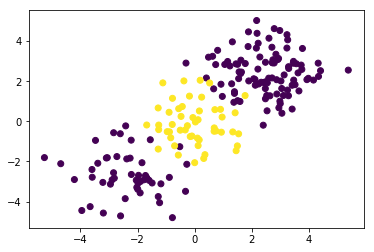

In [7]:
plt.scatter(training_dataset[:, 1], training_dataset[:, 2], c=training_dataset[:, 3]);

Plot test data

In [8]:
test_dataset_D = %sql SELECT * FROM svm_test;
test_dataset = np.array(test_dataset_D)

100 rows affected.


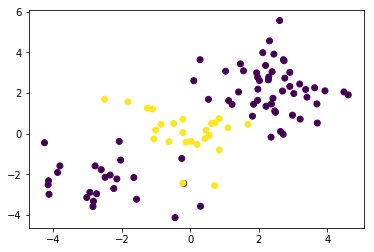

In [9]:
plt.scatter(test_dataset[:, 1], test_dataset[:, 2], c=test_dataset[:, 3]);

# 4. Train SVM

Kernel parameters to note:
* `gamma`:  important for the performance of Gaussian kernel machine; too large means overfit, too small will not capture the complexity of the data.  Default `1/num_features`.
* `n_components`: dimensionality of the transformed feature space; a larger value lowers the variance of the estimate of the kernel and makes for a better decision boundary, but requires more memory and takes longer to train.  (Due to use of primal formulation, not needed in R or other single node implementations using dual formulation which effectively transform to an infinite feature space.)

Other parameters to note:
* `lambda`: regularization parameter
* `n_folds`:  cross validation 

In [10]:
%%sql

drop table if exists svm_training_model;
drop table if exists svm_training_model_summary;
drop table if exists svm_training_model_random;
drop table if exists svm_training_model_cv;

select madlib.svm_classification( 'svm_train', -- input table
                                 'svm_training_model', -- output table
                                 'y', -- response
                                 'ARRAY[1, x1_norm, x2_norm]', --independent variables
                                 'gaussian', -- kernel function
                                 'gamma = 0.05, n_components=200', -- kernel params 
                                 NULL, -- grouping columns
                                 'max_iter = 200, lambda = [0.01, 0.1, 1.0, 10.0], n_folds = 4, validation_result = svm_training_model_cv'  -- other params
                                );

Done.
Done.
Done.
Done.
1 rows affected.


svm_classification
""


In [11]:
%%sql
SELECT * FROM svm_training_model;

1 rows affected.


coef,loss,norm_of_gradient,num_iterations,num_rows_processed,num_rows_skipped,dep_var_mapping
"[-0.247638001187006, -0.0878202315632783, 0.142027045804666, -0.298534161845242, -0.212814693754258, 0.00951936273774327, 0.0309992988764415, 0.0531029822542204, -0.269321459648847, -0.413570239051523, -0.164899619393403, -0.00399219578950107, -0.0782158838838237, 0.0552081571867629, -0.0143547265330704, 0.106642315707336, 0.125067391283005, -0.110514555096947, -0.152346894777986, -0.163901402203572, 0.147093440464267, -0.170748680715982, 0.303175600280573, -0.0454889841414594, -0.0957316690589579, 0.609071293233739, -0.0217382188015194, 0.021435805306995, -0.0204743134939781, 0.242122140191446, -0.0293204986011736, 0.0427269958094875, -0.0314478813475749, 0.10765871050169, -0.00595637092371008, 0.147616811725263, 0.0536475063891488, -0.0727492214606364, 0.19321785771905, 0.429057057862055, -2.56913867142973e-06, -0.118831074306111, 0.00104664647610515, 0.168895055982987, -0.0824613240262346, 0.250621981773729, -0.103971662179853, -0.253440562237518, 0.238287968406832, -0.504857853451738, -0.0110461444686454, -0.128578580654163, 0.0840469794489789, -0.0292783622302947, -0.124404071434733, -0.0159581452338036, 0.448947104884033, -0.0257795422013251, 0.209698448667435, 0.487960181351465, 0.19433332104364, -0.000165521866635228, -0.269382918107344, -0.141140689787238, 0.476033493315934, 0.0198336806853106, -0.024751922721905, -0.0485060422750173, -0.0883207280551508, -0.237724278284468, 0.256490095940052, 0.277624561622209, -0.176677326483865, -0.00847293285028706, 0.0081150052409867, -0.0526495728606435, -0.0217591390507141, -0.00218645551126831, -0.131994172031981, -0.132019920396717, -0.24458307681021, -0.258731599603819, -0.0253331646402694, -0.012004835152084, 0.0484590843480131, 0.113746063551968, -0.00665190835234488, 0.237089752579193, 0.0251132999744867, 0.0850659009677271, -0.00580932301551021, 0.0475269952528408, -0.0929996725409939, 0.249562200675441, -0.334322817668117, 0.133501483887465, 0.39799691520699, -0.0887330559515026, -0.0447047840707671, 0.0257248607130651, 0.00533876334085726, 0.000854839321490486, -0.0499038573036775, -0.102877635058737, -0.185760790473132, -0.0316311467103458, 0.117420466661029, -0.109726079469638, -0.210335275370236, -0.178868771714647, -0.00295782094048036, -0.0202527572739872, -0.266836141609253, -0.0292691352338796, -0.0670733297883694, -0.145119085381695, 0.0295192308263084, 0.030239622497257, 0.18748219396635, 0.0488254597535894, -0.19736914158152, 0.0244543308265674, 0.0309909149769551, 0.179165459115388, -0.0306021961150362, -0.358818847285618, 0.231028707748804, 0.00381082938607031, -0.416749569080756, 0.151427111142064, 0.115063817950119, 0.0385585643259013, -0.21391784482638, 0.0191401296893679, -0.15916630576383, -0.346249836257994, -0.136745402127452, 0.185033353628172, 0.0472385118174406, 0.195470793796848, -0.17974039677141, -0.185963662767924, -0.0812037435448062, 0.47695147228903, 0.104472669130584, 0.0490627997024866, -0.00931746247178089, -0.00641664916784256, -0.20299335091487, 0.501531095014075, 0.1824816793102, -0.16374762576661, 0.0968813401672747, -0.0776690417742163, -0.172953404261275, 0.0756395417844298, -0.178924840285484, 0.53647633154829, -0.079821096269303, -0.224373163213635, -0.0743110679927451, 0.0180641328423829, 0.18414467892906, -0.382609805094148, -0.0763127170383385, 0.0624792765323409, -0.0465983517203798, 0.0199421469578879, 0.0673817264964236, 0.164029425613712, -0.125589475624738, -0.0543498792169311, -0.253752100607004, -0.127120419445205, -0.273583597952251, 0.101482529962103, 0.0765015307153593, 0.061935361780663, -0.175540516981155, -0.268798924265087, 0.258791010430485, -0.224552659163546, -0.209888523876239, 0.0809050291560658, 0.0138355781642866, -0.00830956172228398, -0.146298306139808, -0.109653247157203, 0.00832331641595114, 0.0507631116751362, -0.116282176725908, 0.209210456898655, 0.528683527793701, 0.0303004155181999, -0.00270385056765793,

In [12]:
%%sql
SELECT * FROM svm_training_model_summary;

1 rows affected.


method,version_number,source_table,model_table,dependent_varname,independent_varname,kernel_func,kernel_params,grouping_col,optim_params,reg_params,num_all_groups,num_failed_groups,total_rows_processed,total_rows_skipped
SVC,1.18.0,svm_train,svm_training_model,y,"ARRAY[1, x1_norm, x2_norm]",gaussian,"gamma=0.05, n_components=200,random_state=1, fit_intercept=False, fit_in_memory=True",NULL,"init_stepsize=0.01, decay_factor=0.9, max_iter=200, tolerance=1e-10, epsilon=0.01, eps_table=, class_weight=","lambda=0.01, norm=l2, n_folds=4",1,0,200,0


In [13]:
%%sql
SELECT * FROM svm_training_model_random;

2 rows affected.


[(1, [0.000282463148844145, 1.06854926775554, 1.27363439881687, 4.92113244385683, 5.88050478186476, 2.38371197270601, 0.188191753905778, 5.00152091298268,  ... (3324 characters truncated) ... 6681, 0.862422957415364, 3.91603917597464, 1.49715016768542, 6.02163404564795, 3.86152789612169, 2.83780532030526, 3.97781206811536, 5.10658970250879], u'offsets'),
 (1, [0.132244135344213, 0.0188290441940648, 0.0759280169061063, -0.0138424226185057, -0.127275168329622, -0.0834052175304927, 0.140194970184786, 0.5555475 ... (11509 characters truncated) ... 01960647753032, -0.188438993287052, -0.143863293064765, 0.434553161915615, -0.274577644487135, 0.64880218007095, 0.347559247517978, 0.146438887476848], u'weights')]

In [14]:
%%sql
SELECT * FROM svm_training_model_cv;

4 rows affected.


lambda,mean_score,std_dev_score
0.01,0.78,0.0909212113132
0.1,0.78,0.0909212113132
1.0,0.78,0.100664459137
10.0,0.75,0.0503322295685


# 5. Training accuracy

Predict on training data

In [15]:
%%sql
DROP TABLE IF EXISTS training_acc_out;

SELECT madlib.svm_predict( 'svm_training_model', -- svm model table
                          'svm_train',               -- predict on training input
                          'id', -- id column
                          'training_acc_out'    -- output table
                         );  

Done.
1 rows affected.


svm_predict
""


Count correct predictions

In [16]:
%%sql
SELECT count(*) as train_accuracy_count from
    (select svm_train.y as actual, training_acc_out.prediction as estimated 
     from training_acc_out inner join svm_train
     on svm_train.id=training_acc_out.id) q 
WHERE q.actual=q.estimated;

1 rows affected.


train_accuracy_count
189


Percent correct predictions

In [17]:
%%sql
SELECT round(count(*)*100/200,2) as train_accuracy_percent from
    (select svm_train.y as actual, training_acc_out.prediction as estimated 
     from training_acc_out inner join svm_train
     on svm_train.id=training_acc_out.id) q
WHERE q.actual=q.estimated;

1 rows affected.


train_accuracy_percent
94.00


Plot decision boundary overlayed with training data

In [18]:
# Predict over the decision grid for plotting
# xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['x1_norm', 'x2_norm'])

%sql DROP TABLE IF EXISTS grid_points CASCADE
%sql --persist grid_points

%sql ALTER TABLE grid_points add column X float[]
%sql update grid_points set X = array[x1_norm, x2_norm]::float[]

Done.


[]

'Persisted grid_points'

Done.


[]

10000 rows affected.


[]

Done.
1 rows affected.
10000 rows affected.


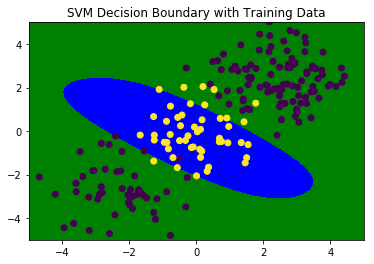

In [19]:
# Plot the decision grid
%sql drop table if exists Z_D;
%sql SELECT madlib.svm_predict('svm_training_model', 'grid_points', 'index', 'Z_D');
Z_D = %sql SELECT decision_function from Z_D order by index
Z = np.array(Z_D)
Z = Z.reshape(xx.shape)

plt.title("SVM Decision Boundary with Training Data")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='blue')
plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors='green')
#plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap=plt.cm.Blues_r)
plt.scatter(training_dataset[:, 1], training_dataset[:, 2], c=training_dataset[:, 3])
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show();

# 7. Test accuracy

Predict on test data

In [20]:
%%sql
DROP TABLE IF EXISTS svm_prediction_results;

SELECT madlib.svm_predict( 'svm_training_model', -- svm model table
                          'svm_test',               -- new data table for predictor input
                          'id', -- id column
                          'svm_prediction_results'    -- output table
                         );  

Done.
1 rows affected.


svm_predict
""


Count correct predictions

In [21]:
%%sql
SELECT count(*) as test_accuracy_count from
    (select svm_test.y as actual, svm_prediction_results.prediction as estimated 
     from svm_prediction_results inner join svm_test
     on svm_test.id=svm_prediction_results.id) q
WHERE q.actual=q.estimated;

1 rows affected.


test_accuracy_count
94


Percent correct predictions

In [22]:
%%sql
SELECT round(count(*)*100/100,2) as test_accuracy_percent from
    (select svm_test.y as actual, svm_prediction_results.prediction as estimated 
     from svm_prediction_results inner join svm_test
     on svm_test.id=svm_prediction_results.id) q
WHERE q.actual=q.estimated;

1 rows affected.


test_accuracy_percent
94.00


Plot decision boundary overlayed with test data

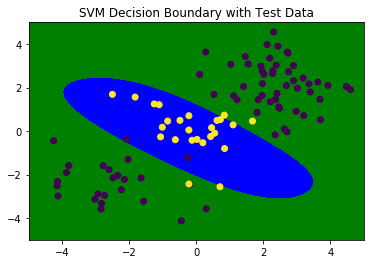

In [23]:
plt.title("SVM Decision Boundary with Test Data")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='blue')
plt.contourf(xx, yy, Z, levels=[Z.min(), 0], colors='green')
#plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap=plt.cm.Blues_r)
plt.scatter(test_dataset[:, 1], test_dataset[:, 2], c=test_dataset[:, 3])
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show();

# 8. Confusion matrix

In [24]:
%%sql

drop table if exists svm_prediction_vs_actual;
create table svm_prediction_vs_actual as (
SELECT p.id, p.y::boolean as actual, g.prediction::boolean as pred
FROM svm_test p, svm_prediction_results g
WHERE p.id = g.id
);

DROP TABLE IF EXISTS svm_confusion_matrix;
SELECT madlib.confusion_matrix( 'svm_prediction_vs_actual', 
                               'svm_confusion_matrix', 
                               'pred', 
                               'actual');

select * from svm_confusion_matrix;

Done.
100 rows affected.
Done.
1 rows affected.
2 rows affected.


row_id,class,confusion_arr
1,False,"[Decimal('73'), Decimal('2')]"
2,True,"[Decimal('4'), Decimal('21')]"
